In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as si

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**1. (a) Implement RK4.**

In [7]:
def _step_rk4(f, t0, y0, dt):
    """
    Perform one Fourth-Order Runge-Kutta Step
    
    :param f: function
                ODE function with input f(t, y)
    :param t0: float
                Initial starting time
    :param y0: numpy.ndarray()
                Initial ODE state (vector)
    :param dt: float
                Timestep
    """
    k1 = f(t0, y0)
    k2 = f(t0 + (dt / 2), y0 + (k1 * dt / 2))
    k3 = f(t0 + (dt / 2), y0 + (k2 * dt / 2))
    k4 = f(t0 + dt, y0 + (k3 * dt))
    y = y0 + dt * ((k1 / 6) + (k2 / 3) +
                   (k3 / 3) + (k4 / 6))
    return (t0 + dt,
            (y0 + dt * ((k1 / 6) + (k2 / 3) +
                (k3 / 3) + (k4 / 6))))



def mrk4(f, t0, y0, dt, n, writecsv=''):
    """
    Fixed-Step Fourth-Order Runge-Kutta ODE Solver
    
    :param f: function
        ODE function with input f(t, y)
    :param t0: float
        Initial starting time
    :param y0: numpy.ndarray()
        Initial ODE state (vector)
    :param dt: float
        Timestep
    :param n: int
        Number of iterations (steps) to perform
    :param writecsv: bool
        :default: False
        Write to csv file?
    """
    dim = y0.size

    # Establish blank solution trajectory
    # [[y00, ..., y0n, t0],
    #  [y10, ..., y1n, t1],
    # ...]
    traj = np.zeros((n + 1, dim + 1), dtype=np.float64)

    # Set initial position
    traj[0, 0:dim] = y0
    traj[0, -1]    = t0

    # Iterate
    for i in range(1, n + 1):
        (traj[i, -1],
         traj[i, 0:dim]) = _step_rk4(f,
                                    traj[i - 1, -1],
                                    traj[i - 1, 0:dim],
                                    dt)

    if writecsv != '':
        with open(writecsv, 'w') as f:
            csvwriter = csv.writer(f)
            [csvwriter.writerow(line) for line in traj]
    return traj

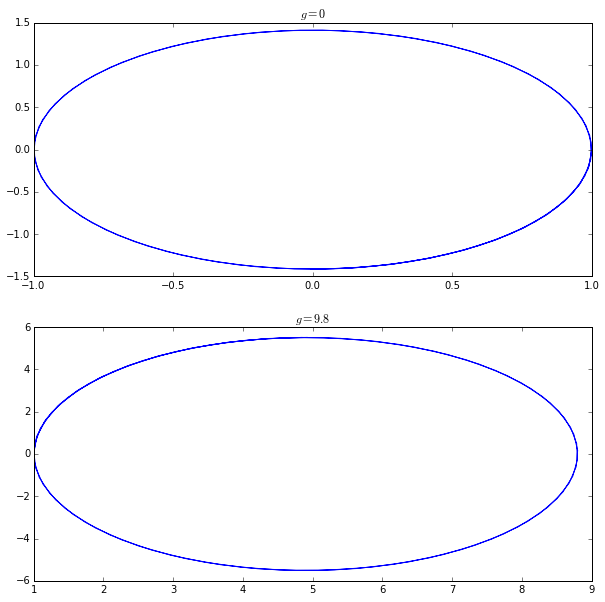

In [13]:
k = 1
m = 0.5
garr = [0, 9.8]

fig, axarr = plt.subplots(len(garr), figsize=(10, 10))
for i in range(len(garr)):
    g = garr[i]
    spring_system = lambda t, y: np.array([y[1],
                                          -(k / m) * y[0] + g])
    initial_condition = np.array([1, 0])
    
    rk_points = mrk4(spring_system, 0, initial_condition, 0.1, 100)

    axarr[i].plot(rk_points[:, 0], rk_points[:, 1], label=r'$g = {}$'.format(g))
    axarr[i].set_title(r'$g = {}$'.format(g))
plt.show()

**(b) Compare your results to the solution generated by the forward Euler solution. Which is more accurate?**

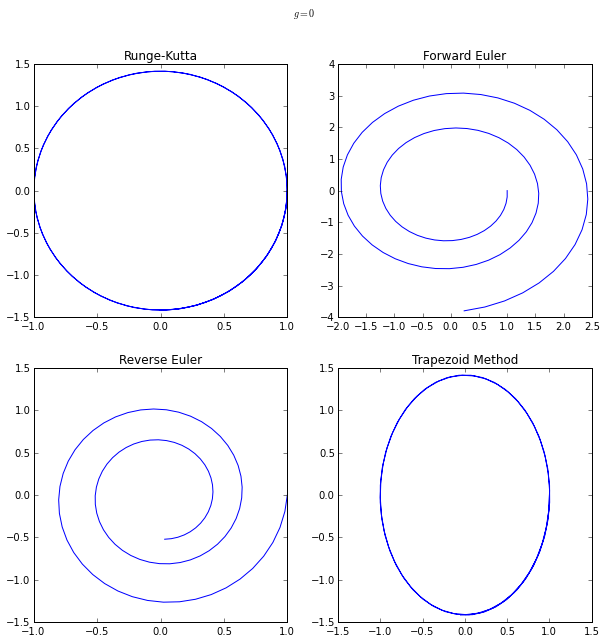

In [17]:
def forward_euler(f, t0, y0, dt, n):
    dim = y0.size
    
    # Establish blank solution trajectory
    # [[y00, ..., y0n, t0],
    #  [y10, ..., y1n, t1],
    # ...]
    traj = np.zeros((n + 1, dim + 1), dtype=np.float64)
    
    # Set initial position
    traj[0, 0:dim] = y0
    traj[0, -1]    = t0
    
    # Iterate
    for i in range(1, n + 1):
        traj[i, -1] = traj[i - 1, -1] + dt
        traj[i, 0:dim] = traj[i - 1, 0:dim] + dt * f(traj[i - 1, -1],
                                                     traj[i - 1, 0:dim])
    return traj
def reverse_euler(f, t0, y0, dt, n):
    dim = y0.size
    
    # Establish blank solution trajectory
    # [[y00, ..., y0n, t0],
    #  [y10, ..., y1n, t1],
    # ...]
    traj = np.zeros((n + 1, dim + 1), dtype=np.float64)
    
    # Set initial position
    traj[0, 0:dim] = y0
    traj[0, -1]    = t0
    
    for i in range(1, n + 1):
        traj[i, -1] = traj[i - 1, -1] + dt
        y = traj[i - 1, 0:dim]
        for j in range(1000):
            y = traj[i - 1, 0:dim] + dt * f(traj[i, -1], y)
        traj[i, 0:dim] = traj[i - 1, 0:dim] + dt * f(traj[i, -1], y)
    return traj
def trapezoid_method(f, t0, y0, dt, n):
    dim = y0.size
    
    # Establish blank solution trajectory
    # [[y00, ..., y0n, t0],
    #  [y10, ..., y1n, t1],
    # ...]
    traj = np.zeros((n + 1, dim + 1), dtype=np.float64)
    
    # Set initial position
    traj[0, 0:dim] = y0
    traj[0, -1]    = t0
    
    for i in range(1, n + 1):
        traj[i, -1] = traj[i - 1, -1] + dt
        traj[i, 0:dim] = (traj[i - 1, 0:dim] +
                          (dt / 2) *
                              (f(traj[i - 1, -1], traj[i - 1, 0:dim]) +
                              f(traj[i - 1, -1] + dt,
                                traj[i - 1, 0:dim] + dt * f(traj[i - 1, -1],
                                                            traj[i - 1, 0:dim]))))
    return traj

k = 1
m = 0.5
garr = [0]

for g in garr:
    spring_system = lambda t, y: np.array([y[1],
                                          -(k / m) * y[0] + g])
    initial_condition = np.array([1, 0])
    rk_points = mrk4(spring_system, 0, initial_condition, 0.1, 100)
    forward_points = forward_euler(spring_system, 0, initial_condition, 0.1, 100)
    reverse_points = reverse_euler(spring_system, 0, initial_condition, 0.1, 100)
    trapezoid_points = trapezoid_method(spring_system, 0, initial_condition, 0.1, 100)

    fig, axarr = plt.subplots(2, 2, figsize=(10, 10))
    axarr[0, 0].plot(rk_points[:, 0], rk_points[:, 1], label='Runge-Kutta')
    axarr[0, 1].plot(forward_points[:, 0], forward_points[:, 1], label='Forward Euler')
    axarr[1, 0].plot(reverse_points[:, 0], reverse_points[:, 1], label='Reverse Euler')
    axarr[1, 1].plot(trapezoid_points[:, 0], trapezoid_points[:, 1], label='Trapezoid Method')
    axarr[0, 0].set_title('Runge-Kutta')
    axarr[0, 1].set_title('Forward Euler')
    axarr[1, 0].set_title('Reverse Euler')
    axarr[1, 1].set_title('Trapezoid Method')
    plt.suptitle(r'$g = {}$'.format(g))
    plt.show()

We can see that Runge-Kutta is far more accurate than forward euler, which spins inward.

**(c) Comment on runtime differences**

Forward Euler is much faster, as it has less computations to run. This makes much sense.

**2. Problem 4(a) and (b) on page 291.**

**Find the solutions of the IVP given by $y(0) = 0$ and the following first order linear differential equations.**

**(a)** $y^\prime = t + y$

$y(t) = -t + e^t - 1$

**(b)** $y^\prime = t - y$

$y(t) = t+e^{-t}-1$

**4. When and why is it a good idea to use an implicit ODE solver?**

One should use an implicit ODE solver when you need to keep the error bounds small, and you have more cycles that you can throw at the program. Because these solvers take more time they are generally implemented less often.